### Librerías

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Importación datos

In [2]:
CSV_FILE = 'datos_clasificacion.csv'

df = pd.read_csv(CSV_FILE)
display(df.head())

,edad,educacion_madre,educacion_padre,tiempo_viaje,tiempo_estudio,relacion_familiar,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,...,independizado_padres_True,ocupacion_madre_True,ocupacion_padre_True,razon_matricula_True,interes_educacion_superior_True,internet_casa_True,apoyo_escolar_True,apoyo_familiar_True,actividades_True,relacion_romantica_True
0,15.0,4.0,3.0,1.0,3.0,5.0,4.0,3.0,1.0,1.0,...,1,1,1,1,1,1,0,1,1,0
1,18.0,2.0,2.0,2.0,3.0,4.0,2.0,1.0,1.0,1.0,...,1,1,1,1,1,1,0,0,0,1
2,17.0,3.0,2.0,1.0,1.0,5.0,5.0,5.0,2.0,4.0,...,1,1,1,1,1,1,0,1,1,0
3,18.0,4.0,4.0,1.0,2.0,2.0,4.0,4.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
4,19.0,4.0,2.0,2.0,2.0,5.0,4.0,4.0,1.0,1.0,...,1,1,1,1,1,1,0,1,1,1


### Separación de varibles por grupos

In [3]:
# Dividir las columnas en académicas y sociales/demográficas
academicas = [
    'tiempo_estudio', 'relacion_familiar', 
    'salir_amigos', 'consumo_alcohol_entre_semana', 
    'consumo_alcohol_fin_de_semana'
]

sociales = [
    'edad', 'educacion_madre', 'educacion_padre', 
    'ocupacion_madre_True', 'ocupacion_padre_True', 
    'independizado_padres_True'
]

In [4]:
# Escalar las variables para ambas categorías
scaler = StandardScaler()
academicas_scaled = scaler.fit_transform(df[academicas].dropna())
sociales_scaled = scaler.fit_transform(df[sociales].dropna())

In [5]:
# Realizar clusterización para académicas
kmeans_academicas = KMeans(
    n_clusters=3, 
    random_state=42
)
df['cluster_academicas'] = kmeans_academicas.fit_predict(academicas_scaled)

# Realizar clusterización para sociales
kmeans_sociales = KMeans(
    n_clusters=3, 
    random_state=42
)
df['cluster_sociales'] = kmeans_sociales.fit_predict(sociales_scaled)

Cruce de Clústeres:
cluster_sociales      0   1   2
cluster_academicas             
0                    64  36  26
1                   142  93  74
2                    80  32  40


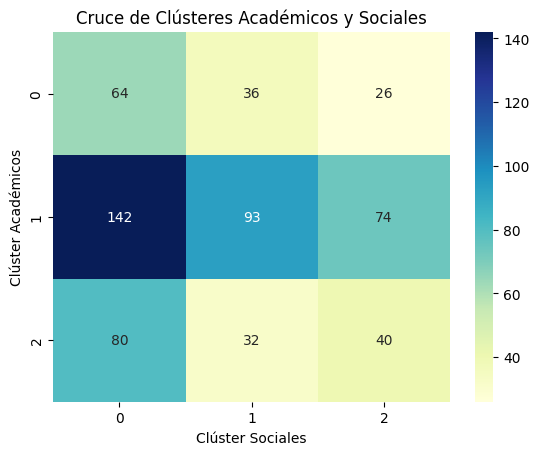

In [ ]:
# Visualizar cómo se cruzan los clústeres
cruce = pd.crosstab(
    df['cluster_academicas'], 
    df['cluster_sociales']
)

# Mostrar la tabla de cruce
print("Cruce de Clústeres:")
print(cruce)

# Visualización de los clústeres
sns.heatmap(cruce, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Cruce de Clústeres Académicos y Sociales")
plt.xlabel("Clúster Sociales")
plt.ylabel("Clúster Académicos")
plt.show()

# Interpretación del Cruce de Clústeres Académicos y Sociales

## Análisis General
El gráfico de calor muestra cómo se distribuyen los estudiantes entre los clústeres académicos y sociales. Las cifras en cada celda representan el número de estudiantes que pertenecen a ambos clústeres al mismo tiempo.

### Puntos Clave
1. **Clúster Académico 0:**
   - Este clúster está moderadamente distribuido entre los clústeres sociales, con un mayor número de estudiantes en el clúster social `0` (64 estudiantes).
   - Esto sugiere que los estudiantes de este clúster académico tienen características demográficas relativamente homogéneas con una ligera inclinación hacia el clúster social `0`.

2. **Clúster Académico 1:**
   - Es el grupo más grande y está dominado por estudiantes en el clúster social `0` (142 estudiantes).
   - Esto indica una fuerte correlación entre el clúster social `0` y las características académicas de este grupo, sugiriendo que el rendimiento académico está fuertemente influenciado por factores demográficos del clúster social `0`.

3. **Clúster Académico 2:**
   - Este grupo tiene una distribución más equilibrada entre los clústeres sociales, con un número ligeramente mayor de estudiantes en el clúster social `0` (80 estudiantes).
   - Esto podría indicar que los estudiantes de este clúster académico tienen una diversidad más amplia de características demográficas.

## Observaciones
- **Clúster Social `0`:** Parece ser el clúster demográfico más influyente, ya que tiene la mayor cantidad de estudiantes en todos los clústeres académicos.
- **Clúster Social `1` y `2`:** Estos clústeres tienen una representación más baja en comparación con el clúster social `0`, lo que podría indicar menor relevancia demográfica o una menor población en estos grupos.

## Conclusiones
- Existe una clara correlación entre el clúster académico `1` y el clúster social `0`, lo que sugiere que los factores demográficos asociados al clúster social `0` están relacionados con el rendimiento académico.
- Los clústeres académicos `0` y `2` tienen una distribución más equilibrada entre los clústeres sociales, lo que podría representar una mayor diversidad en las características sociales.